In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math
import skimage.util as skp
from  skimage.metrics import peak_signal_noise_ratio, structural_similarity
import cv2
plt.style.use('dark_background')

In [1]:
def pixelwise_difference(img1, img2):
    return np.sum(np.absolute(img1-img2)) / (img1.shape[0]*img1.shape[1])

def compare_image(img_true, img_noise, img_filtered):
    score, _ = structural_similarity(img_noise, img_filtered, full=True)
    # diff_img = (diff*255).astype(np.uint8)
    score = np.round(score, 2)
    psnr = np.round(peak_signal_noise_ratio(img_noise, img_filtered, data_range=255), 2)

    plt.figure(figsize=(18,6))
    plt.subplot(1,3,1)
    plt.suptitle(f'SSIM score: {score}, PSNR: {psnr}')
    plt.axis('off')
    plt.title('True')
    plt.imshow(img_true, cmap='gray', vmax=255, vmin=0)
    plt.subplot(1,3,2)
    plt.axis('off')
    plt.title('Noisy')
    plt.imshow(img_noise, cmap='gray', vmax=255, vmin=0)
    plt.subplot(1,3,3)
    plt.axis('off')
    plt.title('Filtered')
    plt.imshow(img_filtered, cmap='gray', vmax=255, vmin=0)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

def show_image(img, title=None):
    if title is not None:
        plt.title(title)
    plt.imshow(img, cmap='gray', vmax=255, vmin=0)
    plt.axis('off')
    # plt.show()

In [4]:
# kernel = 5
original_image = cv2.imread('images/qcirchirp.bmp', cv2.IMREAD_GRAYSCALE)
image_with_noise = skp.random_noise(original_image, mode='s&p', amount=0.1, clip=True)
image_with_noise = (image_with_noise * 255).astype(np.uint8)
# gaussian_blurred_image = cv2.GaussianBlur(image_with_noise, (kernel,kernel), sigmaX=50)
# gray_image = np.ones(original_image.shape)* 127
# compare_image(original_image, image_with_noise)

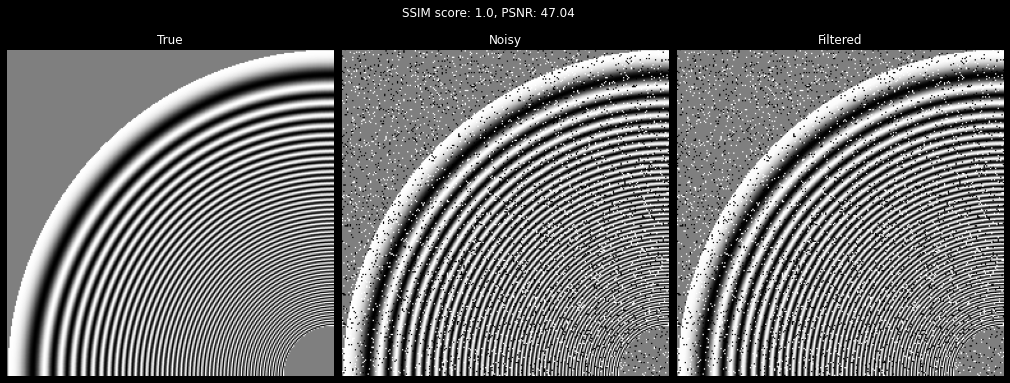

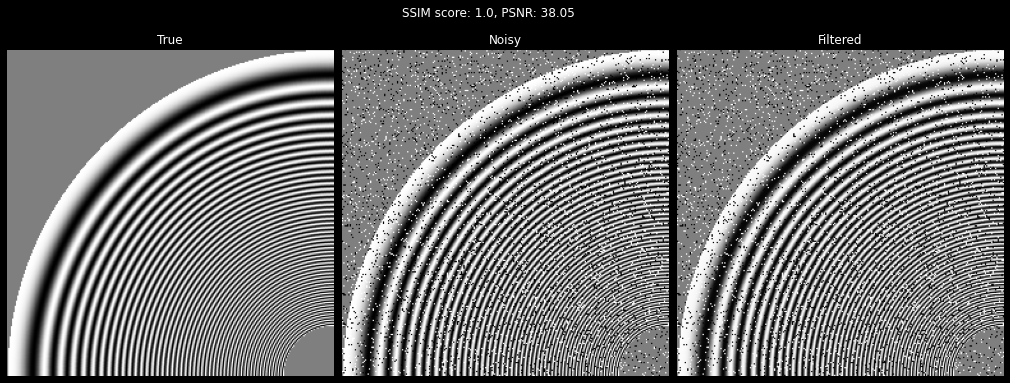

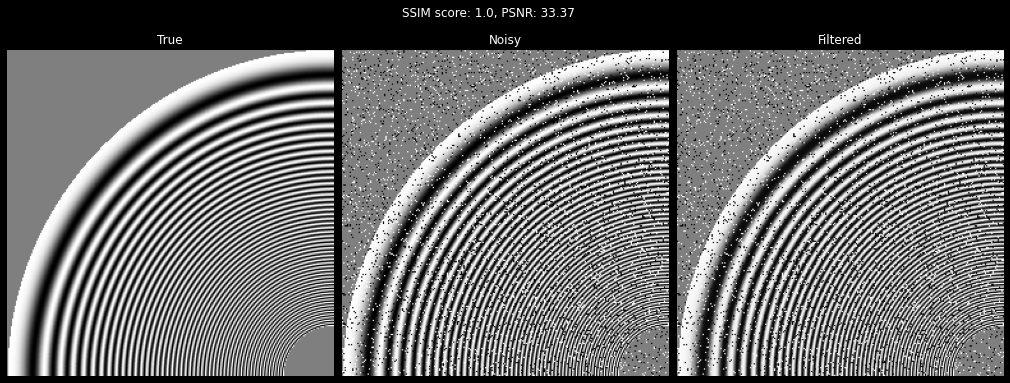

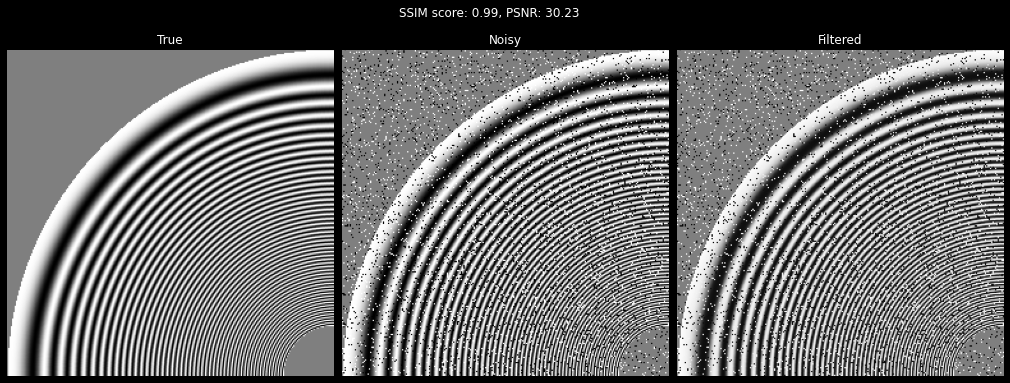

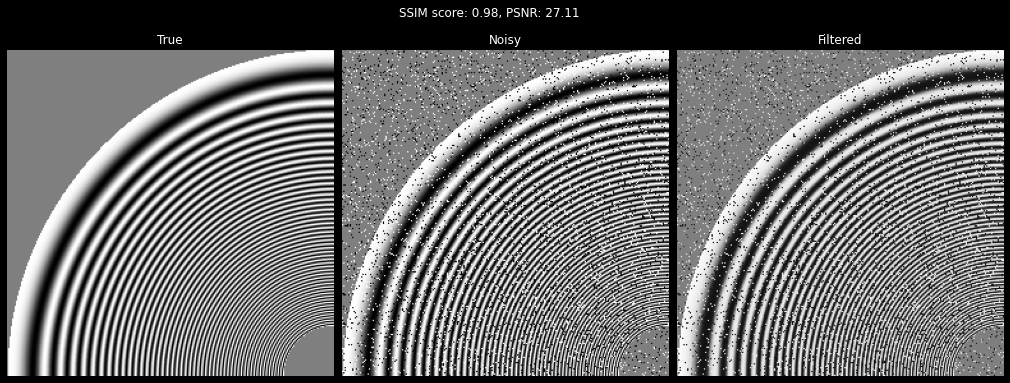

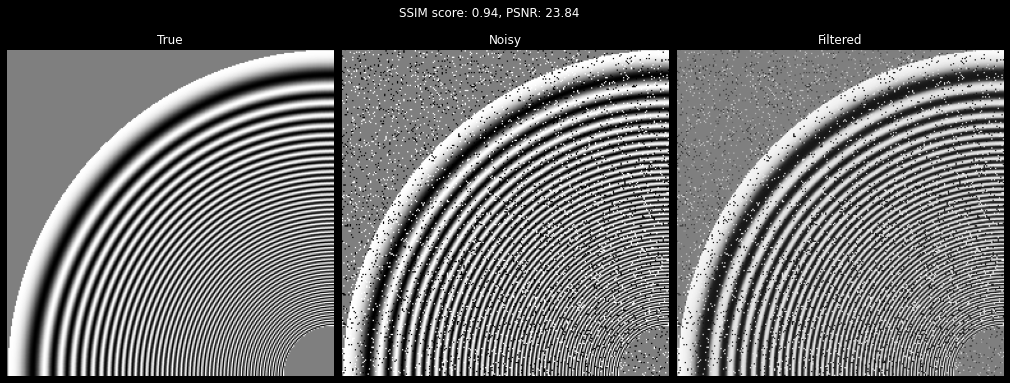

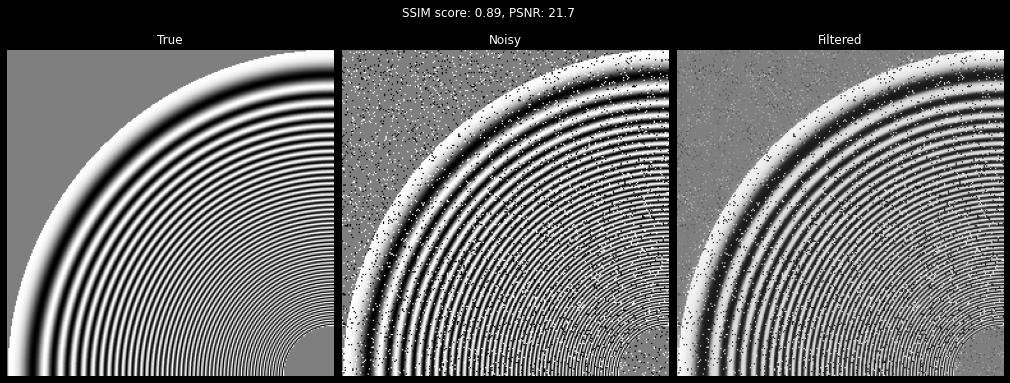

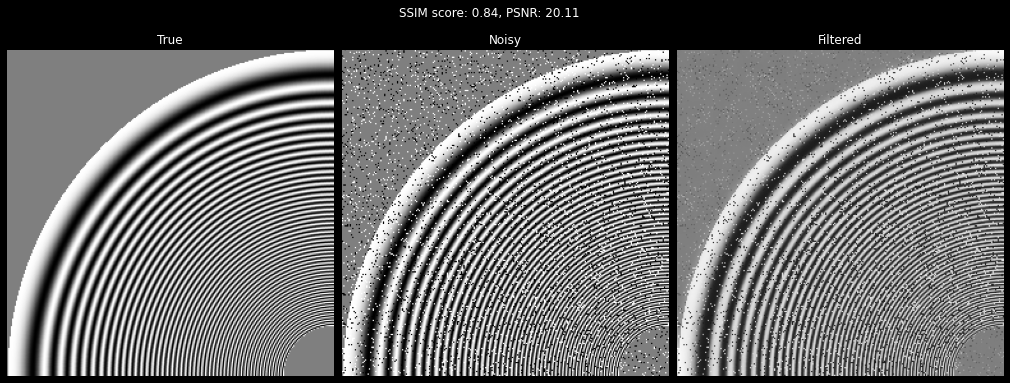

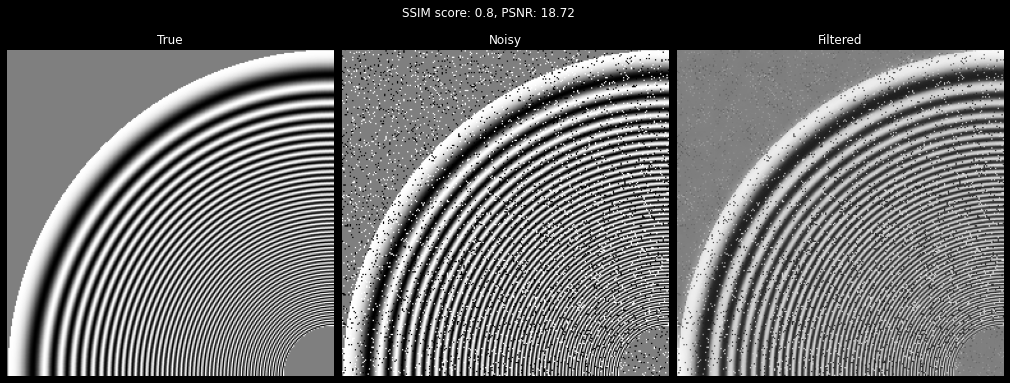

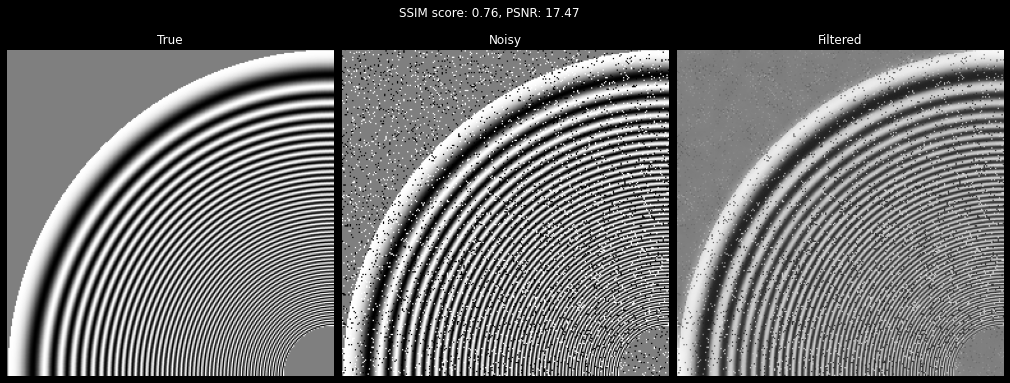

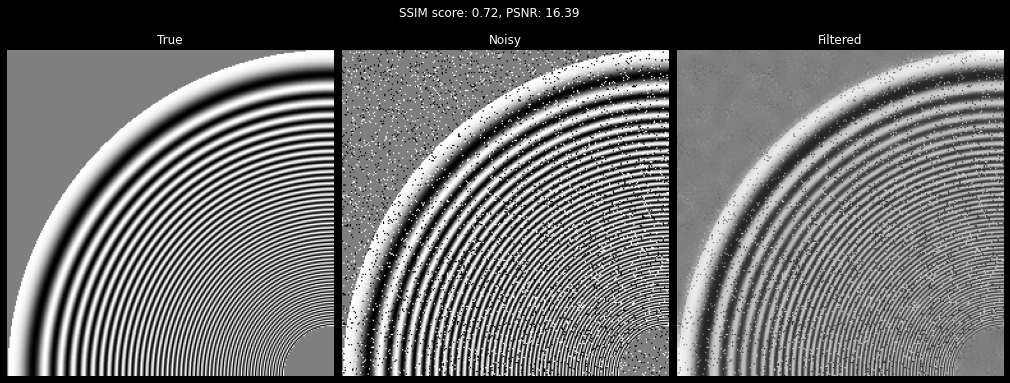

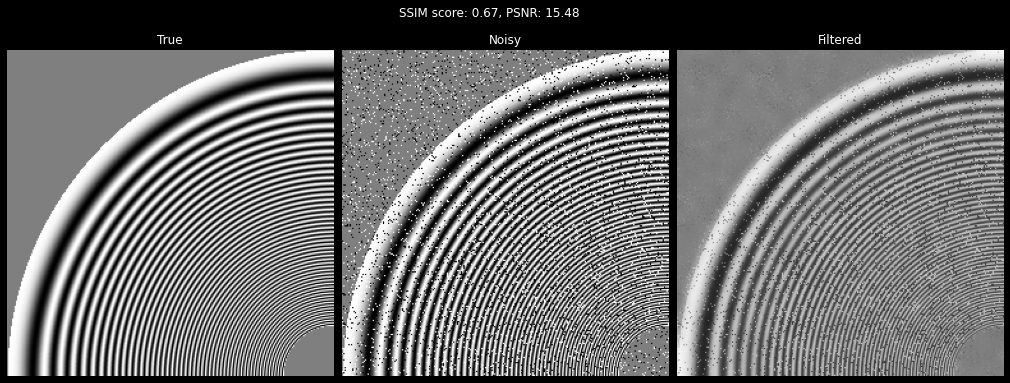

In [5]:
for i in range(5, 120, 10):
    filtered_image = cv2.bilateralFilter(image_with_noise, 15, sigmaColor=i, sigmaSpace=50)
    # filtered_image = cv2.GaussianBlur(image_with_noise, (i,i), sigmaX=70)
    compare_image(original_image, image_with_noise, filtered_image)